In [1]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import math
from scipy import special
import numpy
import pylab
import mpmath
from matplotlib import cm
import numpy as np
import pickle
from matplotlib.patches import Rectangle, Circle
import matplotlib.colors as colors

# Contour plots of bilayer graphene dispersion

## Effective model dispersion with gap

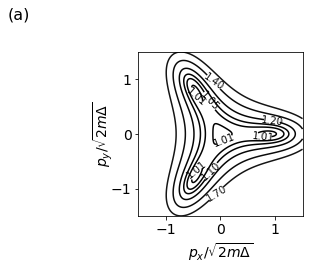

In [6]:
#test plot
x = np.linspace(-1.5, 1.5, 900)
KX, KY = np.meshgrid(x, x)

v3_vf_param = 0.1
g1d_param = 390/5.0
dispersion_trigonal = np.sqrt((KX**2+KY**2)**2+1+v3_vf_param**2*g1d_param*(KX**2+KY**2)-(KX**2+KY**2)**(3/2)*2*v3_vf_param*np.sqrt(g1d_param)*\
                             (4*(KX/np.sqrt(KX**2+KY**2))**3-3*KX/np.sqrt(KX**2+KY**2)))



fig = plt.subplot(111)

cs = plt.contour(KX, KY, dispersion_trigonal, levels=[1.01, 1.05, 1.1, 1.2, 1.4, 1.7], 
                 cmap = 'gray', vmin=1.0, vmax=9.9)
#cs = plt.contour(KX, KY, dispersion_trigonal, levels=200, cmap = 'viridis', vmin=1.0, vmax=5.9)
plt.gca().clabel(cs, cs.levels, inline=True, fontsize=10)


plt.xlim(min(x),max(x))
plt.ylim(min(x),max(x))

#circ = Circle((0.0, 0.0), 1.8, transform=plt.gca().transData)
#for coll in cs.collections:
#    coll.set_clip_path(circ)

plt.gca().set_aspect('equal')


#plt.xticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
#plt.yticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.gca().tick_params(which='major', labelsize=14)
plt.xlabel(r'$p_x/\sqrt{2m\Delta}$', fontsize=14)
plt.ylabel(r'$p_y/\sqrt{2m\Delta}$', fontsize=14, labelpad=-4)

plt.text(-3.9, 2.1, '(a)', fontsize=16)
plt.tight_layout()
#plt.savefig('fig2_trigonal_warping_contours_a_d5meV.pdf')
plt.show()

## Tight-binding Hamiltonian: mexican hat and asymmetric regime

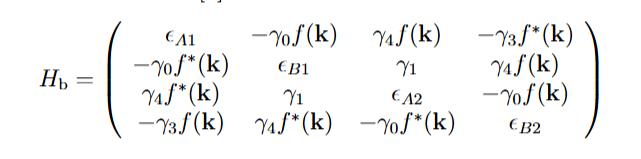

In [83]:
def spectrum_bilayer(kx, ky, params):
    '''vectorized function that calculated spectrum of bilayer graphene'''
    a = params['a'] #lattice constant
    delta = params['delta'] #halfgap
    deltap = params['deltap'] #asymmetry gap
    gamma0 = params['gamma0']
    gamma1 = params['gamma1']
    gamma3 = params['gamma3']
    gamma4 = params['gamma4']
    
    ffunc = np.exp(1j*ky*a/np.sqrt(3))+np.exp(1j*(kx*a/2.0-ky*a/(2*np.sqrt(3))))+np.exp(1j*(-kx*a/2.0-ky*a/(2*np.sqrt(3))))
    ffunc_conj = np.exp(-1j*ky*a/np.sqrt(3))+np.exp(-1j*(kx*a/2.0-ky*a/(2*np.sqrt(3))))+np.exp(-1j*(-kx*a/2.0-ky*a/(2*np.sqrt(3))))
    
    hamiltonian_mat = np.zeros((len(kx), 4, 4), dtype=complex)
    hamiltonian_mat[:, 0,0] = -delta*np.ones(len(kx))
    hamiltonian_mat[:, 1,1] = (-delta+deltap)*np.ones(len(kx))
    hamiltonian_mat[:, 2,2] = (delta+deltap)*np.ones(len(kx))
    hamiltonian_mat[:, 3,3] = delta*np.ones(len(kx))
    
    hamiltonian_mat[:, 0,1] = -gamma0*ffunc
    hamiltonian_mat[:, 1,0] = -gamma0*ffunc_conj
    hamiltonian_mat[:, 0,2] = gamma4*ffunc
    hamiltonian_mat[:, 2,0] = gamma4*ffunc_conj
    hamiltonian_mat[:, 0,3] = -gamma3*ffunc_conj
    hamiltonian_mat[:, 3,0] = -gamma3*ffunc
    
    hamiltonian_mat[:, 1,2] = gamma1*np.ones(len(kx))
    hamiltonian_mat[:, 2,1] = gamma1*np.ones(len(kx))
    
    hamiltonian_mat[:, 1,3] = gamma4*ffunc
    hamiltonian_mat[:, 3,1] = gamma4*ffunc_conj
    hamiltonian_mat[:, 2,3] = -gamma0*ffunc
    hamiltonian_mat[:, 3,2] = -gamma0*ffunc_conj
    
    eigvals = np.linalg.eigvalsh(hamiltonian_mat)
    
    # return (eigvals[:, 0], eigvals[:, 1], eigvals[:, 2], eigvals[:, 3]) 
    return eigvals.T

(-9.537821750571847, -0.36894906989170395) (-9.461279799617706, -0.014084741308300865) (0.01653231974161762, 8.724280889921793) (0.41050149145838727, 10.318820660267757)


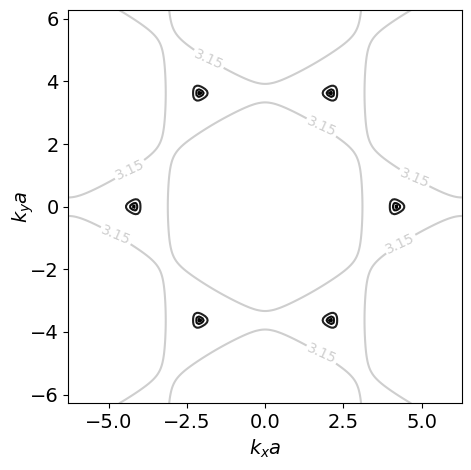

In [84]:
#mexican hat version - no trigonal warping
# parameters = {'a':1.0, 'delta':0.0, 'deltap':0.0, 'gamma0':3.16, 'gamma1p':0.0, 'gamma1':0.381, 'gamma3':0.0, 'gamma4':0.0}
parameters = {'a':1.0, 'delta':0.0, 'deltap':0.022, 'gamma0':3.16, 'gamma1p':0.0, 'gamma1':0.381, 'gamma3':0.38, 'gamma4':0.14}
x = np.linspace(-2*np.pi, 2*np.pi, 200)
KX, KY = np.meshgrid(x, x)
band1, band2, band3, band4 = spectrum_bilayer(KX.flatten(), KY.flatten(), parameters)
print((min(band1), max(band1)), (min(band2), max(band2)), (min(band3), max(band3)), (min(band4), max(band4)))
fig = plt.subplot(111)

cs = plt.contour(KX, KY, band3.reshape((len(x), len(x))), levels=[0.01, 0.05, 0.2, 0.5, 3.15], 
                 cmap = 'gray', vmin=0.0, vmax=3.9)

# cs = plt.contour(KX, KY, band2.reshape((len(x), len(x))), levels=20, 
#                 cmap = 'gray', vmin=0.1, vmax=0.9)
#print(max(band1))
plt.gca().clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlim(min(x),max(x))
plt.ylim(min(x),max(x))
plt.gca().set_aspect('equal')
plt.gca().tick_params(which='major', labelsize=14)
plt.xlabel(r'$k_x a$', fontsize=14)
plt.ylabel(r'$k_y a$', fontsize=14, labelpad=-4)
#plt.text(-3.9, 2.1, '(a)', fontsize=16)
plt.tight_layout()
#plt.savefig('fig2_trigonal_warping_contours_a_d5meV.pdf')
plt.show()

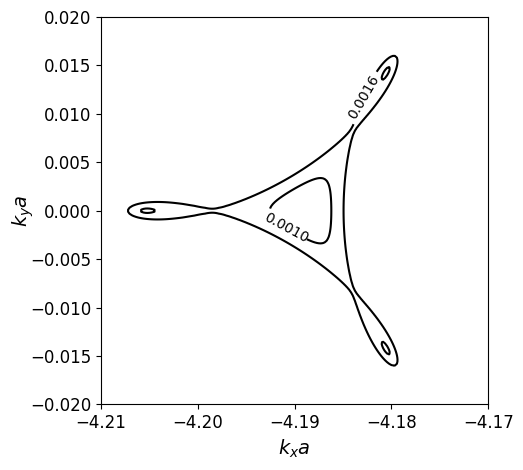

In [89]:
#these are degault params in fast recursion 
# parameters = {'a':1.0, 'delta':0.00, 'deltap':0.0, 'gamma0':3.16, 'gamma1p':0.0, 'gamma1':0.381, 'gamma3':0.38, 'gamma4':0.0}
parameters = {'a':1.0, 'delta':0.00, 'deltap':0.022, 'gamma0':3.16, 'gamma1p':0.0, 'gamma1':0.381, 'gamma3':0.38, 'gamma4':0.14}
x = np.linspace(-4.21, -4.17, 200)
y = np.linspace(-0.02, 0.02, 200)
KX, KY = np.meshgrid(x, y)
band1, band2, band3, band4 = spectrum_bilayer(KX.flatten(), KY.flatten(), parameters)
fig = plt.subplot(111)

cs = plt.contour(KX, KY, band3.reshape((len(x), len(x))), levels=[0.001, 0.0016], 
                 cmap = 'gray', vmin=0.0, vmax=3.9)

# cs = plt.contour(KX, KY, band3.reshape((len(x), len(x))), levels=[0.0006,0.0007], 
#                  cmap = 'gray', vmin=0.0, vmax=3.9)

#cs = plt.contour(KX, KY, band2.reshape((len(x), len(x))), levels=20, 
#                 cmap = 'gray', vmin=0.1, vmax=0.9)
#print(max(band1))
plt.gca().clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.gca().set_aspect('equal')
plt.gca().tick_params(which='major', labelsize=12)
plt.xlabel(r'$k_x a$', fontsize=14)
plt.ylabel(r'$k_y a$', fontsize=14, labelpad=-4)
#plt.text(-4.31, 0.05, '(c)', fontsize=16)
plt.tight_layout()
#plt.savefig('fig2_trigonal_warping_contours_a_d5meV.pdf')
plt.show()

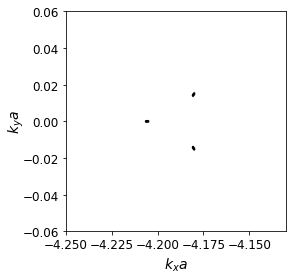

In [94]:
#mexican hat version - no trigonal warping
parameters = {'a':1.0, 'delta':0.00, 'deltap':0.022, 'gamma0':3.16, 'gamma1p':0.0, 'gamma1':0.381, 'gamma3':0.38, 'gamma4':0.14}
x = np.linspace(-4.25, -4.13, 200)
y = np.linspace(-0.06, 0.06, 200)
KX, KY = np.meshgrid(x, y)
band1, band2, band3, band4 = spectrum_bilayer(KX.flatten(), KY.flatten(), parameters)
fig = plt.subplot(111)

cs = plt.contour(KX, KY, band2.reshape((len(x), len(x))), levels=[0.0004, 0.0016, 0.005, 0.03, 0.04], 
                 cmap = 'gray', vmin=0.0, vmax=3.9)

#cs = plt.contour(KX, KY, band2.reshape((len(x), len(x))), levels=20, 
#                 cmap = 'gray', vmin=0.1, vmax=0.9)
#print(max(band1))
plt.gca().clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.gca().set_aspect('equal')
plt.gca().tick_params(which='major', labelsize=12)
plt.xlabel(r'$k_x a$', fontsize=14)
plt.ylabel(r'$k_y a$', fontsize=14, labelpad=-4)
#plt.text(-4.31, 0.05, '(c)', fontsize=16)
plt.tight_layout()
#plt.savefig('fig2_trigonal_warping_contours_a_d5meV.pdf')
plt.show()

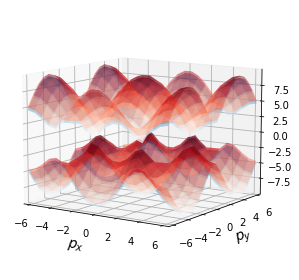

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

parameters = {'a':1.0, 'delta':0.0, 'deltap':0.0, 'gamma0':3.16, 'gamma1p':0.0, 'gamma1':0.381, 'gamma3':0.0, 'gamma4':0.0}
x = np.linspace(-2*np.pi, 2*np.pi, 20)
KX, KY = np.meshgrid(x, x)
band1, band2, band3, band4 = spectrum_bilayer(KX.flatten(), KY.flatten(), parameters)


cs = ax.plot_surface(KX, KY, band1.reshape((len(x), len(x))), cmap='Blues',
                       linewidth=0, antialiased=True, alpha=0.5)

cs2 = ax.plot_surface(KX, KY, band2.reshape((len(x), len(x))), cmap='Reds',
                       linewidth=0, antialiased=True, alpha=0.5)

cs3 = ax.plot_surface(KX, KY, band3.reshape((len(x), len(x))), cmap='Blues',
                       linewidth=0, antialiased=True, alpha=0.5)

cs4 = ax.plot_surface(KX, KY, band4.reshape((len(x), len(x))), cmap='Reds',
                       linewidth=0, antialiased=True, alpha=0.5)


ax.set_xlim(min(x),max(x))
ax.set_ylim(min(x),max(x))

ax.set_xlabel(r'$p_x$', fontsize=14)
ax.set_ylabel(r'$p_y$', fontsize=14)

ax.view_init(elev=10, azim=-56)

#plt.text(-2.8, 1.4, '(a)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#full dispersion with trigonal warping, but no asymmetry and gamma4
parameters = {'a':1.0, 'delta':20.0, 'deltap':0.0, 'gamma0':3.16, 'gamma1':0.381, 'gamma3':0.38, 'gamma4':0.14}


# Plots for paper

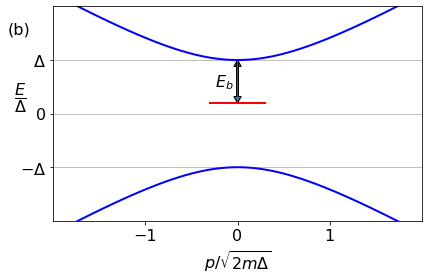

In [4]:
fig = plt.subplot(111)
plt.plot(np.linspace(-2,2, 100), np.sqrt(np.ones(100)+np.linspace(-2,2, 100)**2), color='blue', linewidth=2.0)
plt.plot(np.linspace(-2,2, 100), -np.sqrt(np.ones(100)+np.linspace(-2,2, 100)**2), color='blue', linewidth=2.0)

plt.xlabel(r'$p/\sqrt{2m\Delta}$', fontsize=16)
plt.ylabel(r'$\dfrac{E}{\Delta}$', fontsize=16, labelpad=0, rotation=0)
plt.xticks(ticks=[-1,0,1], size=16)
plt.yticks(ticks=[-1,0,1], labels=[r'$-\Delta$', '0', r'$\Delta$'], size=16)
plt.grid(axis='y')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([-0.3, 0.3], [0.2, 0.2], color='red', linewidth=2.0)
plt.arrow(0, 0.2, 0, 0.8, shape='full', width=0.02, length_includes_head=True, head_width=0.08)
plt.arrow(0, 1.0, 0, -0.8, shape='full', width=0.02, length_includes_head=True, head_width=0.08)
plt.text(-0.25, 0.5, r'$E_b$', fontsize=16)
plt.text(-2.5, 1.5, '(b)', fontsize=16)
plt.tight_layout()
plt.savefig('fig1_spectrum_and_Eb.pdf')
plt.show()

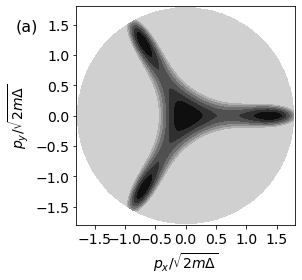

In [91]:
#spectral plot with trigonal warping
#cos 3 phi = 4 cos^3 phi - 3 cos phi
#cos phi = x / sqrt(x^2+y^2)

x = np.linspace(-1.8, 1.8, 400)
KX, KY = np.meshgrid(x, x)

g1d_param = 390/2.0
dispersion_trigonal = np.sqrt((KX**2+KY**2)**2+1+0.1**2*g1d_param*(KX**2+KY**2)-(KX**2+KY**2)**(3/2)*0.2*np.sqrt(g1d_param)*\
                             (4*(KX/np.sqrt(KX**2+KY**2))**3-3*KX/np.sqrt(KX**2+KY**2)))


dispersion_trigonal[dispersion_trigonal>1.35] = 1.35
dispersion_trigonal[np.sqrt(KX**2+KY**2)>1.8] = 5.5

fig = plt.subplot(111)

#cmap = colors.ListedColormap(['gray','red'])
#bounds = [1.0,1.1,2.5]
#norm = colors.BoundaryNorm(bounds, cmap.N)

#plt.contourf(KX, KY, dispersion_trigonal, levels=np.concatenate((np.linspace(1.0, 1.1, 20), np.linspace(1.11, 4.1, 20))), 
#             cmap = cmap, norm = norm)

plt.contourf(KX, KY, dispersion_trigonal, levels=100, 
             cmap = 'gray', vmin=1.0, vmax=1.4)

#plt.contour(KX, KY, dispersion_trigonal, levels=200, cmap='gray', #vmin=1.04, vmax = 1.4, 
#             norm=colors.LogNorm(vmin=dispersion_trigonal.min(), vmax=dispersion_trigonal.max()))


plt.xlim(min(x),max(x))
plt.ylim(min(x),max(x))

plt.gca().set_aspect('equal')


plt.xticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.yticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.xlabel(r'$p_x/\sqrt{2m\Delta}$', fontsize=14)
plt.ylabel(r'$p_y/\sqrt{2m\Delta}$', fontsize=14)

plt.text(-2.8, 1.4, '(a)', fontsize=16)
plt.tight_layout()
plt.savefig('fig2_trigonal_warping_contours_a_d2meV.pdf')
plt.show()

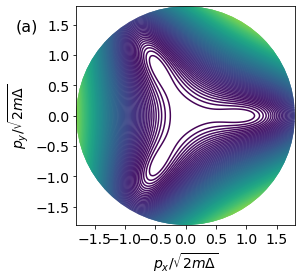

In [41]:
x = np.linspace(-1.8, 1.8, 500)
KX, KY = np.meshgrid(x, x)

g1d_param = 390/5.0
dispersion_trigonal = np.sqrt((KX**2+KY**2)**2+1+0.1**2*g1d_param*(KX**2+KY**2)-(KX**2+KY**2)**(3/2)*0.2*np.sqrt(g1d_param)*\
                             (4*(KX/np.sqrt(KX**2+KY**2))**3-3*KX/np.sqrt(KX**2+KY**2)))


#dispersion_trigonal[dispersion_trigonal>1.25] = 1.25
#dispersion_trigonal[np.sqrt(KX**2+KY**2)>1.8] = 5.5

fig = plt.subplot(111)

#cmap = colors.ListedColormap(['gray','red'])
#bounds = [1.0,1.1,2.5]
#norm = colors.BoundaryNorm(bounds, cmap.N)

#plt.contourf(KX, KY, dispersion_trigonal, levels=np.concatenate((np.linspace(1.0, 1.1, 20), np.linspace(1.11, 4.1, 20))), 
#             cmap = cmap, norm = norm)

#cs = plt.contour(KX, KY, dispersion_trigonal, levels=100, cmap = 'gray', vmin=1.0, vmax=5.9)
cs = plt.contour(KX, KY, dispersion_trigonal, levels=200, cmap = 'viridis', vmin=1.0, vmax=5.9)


#plt.contour(KX, KY, dispersion_trigonal, levels=200, cmap='gray', #vmin=1.04, vmax = 1.4, 
#             norm=colors.LogNorm(vmin=dispersion_trigonal.min(), vmax=dispersion_trigonal.max()))


plt.xlim(min(x),max(x))
plt.ylim(min(x),max(x))

circ = Circle((0.0, 0.0), 1.8, transform=plt.gca().transData)
for coll in cs.collections:
    coll.set_clip_path(circ)

plt.gca().set_aspect('equal')


plt.xticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.yticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.xlabel(r'$p_x/\sqrt{2m\Delta}$', fontsize=14)
plt.ylabel(r'$p_y/\sqrt{2m\Delta}$', fontsize=14)

plt.text(-2.8, 1.4, '(a)', fontsize=16)
plt.tight_layout()
plt.savefig('fig2_trigonal_warping_contours_a_d5meV.pdf')
plt.show()

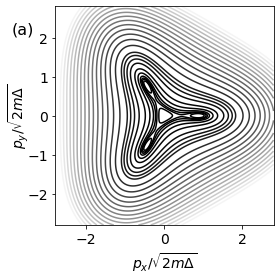

In [86]:
x = np.linspace(-2.8, 2.8, 900)
KX, KY = np.meshgrid(x, x)

g1d_param = 390/5.0
dispersion_trigonal = np.sqrt((KX**2+KY**2)**2+1+0.1**2*g1d_param*(KX**2+KY**2)-(KX**2+KY**2)**(3/2)*0.2*np.sqrt(g1d_param)*\
                             (4*(KX/np.sqrt(KX**2+KY**2))**3-3*KX/np.sqrt(KX**2+KY**2)))


#dispersion_trigonal[dispersion_trigonal>1.25] = 1.25
#dispersion_trigonal[np.sqrt(KX**2+KY**2)>1.8] = 5.5

fig = plt.subplot(111)

#cmap = colors.ListedColormap(['gray','red'])
#bounds = [1.0,1.1,2.5]
#norm = colors.BoundaryNorm(bounds, cmap.N)

#plt.contourf(KX, KY, dispersion_trigonal, levels=np.concatenate((np.linspace(1.0, 1.1, 20), np.linspace(1.11, 4.1, 20))), 
#             cmap = cmap, norm = norm)

cs = plt.contour(KX, KY, dispersion_trigonal, levels=[1.01, 1.02, 1.03, 1.05, 1.1, 1.2, 1.4, 1.6, 1.8, 
                                                       2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6, 6.5, 7, 7.5,  
                                                      8, 8.5, 9, 9.5, 10], 
                 cmap = 'gray', vmin=1.0, vmax=9.9)
#cs = plt.contour(KX, KY, dispersion_trigonal, levels=200, cmap = 'viridis', vmin=1.0, vmax=5.9)


#plt.contour(KX, KY, dispersion_trigonal, levels=200, cmap='gray', #vmin=1.04, vmax = 1.4, 
#             norm=colors.LogNorm(vmin=dispersion_trigonal.min(), vmax=dispersion_trigonal.max()))


plt.xlim(min(x),max(x))
plt.ylim(min(x),max(x))

#circ = Circle((0.0, 0.0), 1.8, transform=plt.gca().transData)
#for coll in cs.collections:
#    coll.set_clip_path(circ)

plt.gca().set_aspect('equal')


#plt.xticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
#plt.yticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.gca().tick_params(which='major', labelsize=14)
plt.xlabel(r'$p_x/\sqrt{2m\Delta}$', fontsize=14)
plt.ylabel(r'$p_y/\sqrt{2m\Delta}$', fontsize=14, labelpad=-4)

plt.text(-3.9, 2.1, '(a)', fontsize=16)
plt.tight_layout()
plt.savefig('fig2_trigonal_warping_contours_a_d5meV.pdf')
plt.show()

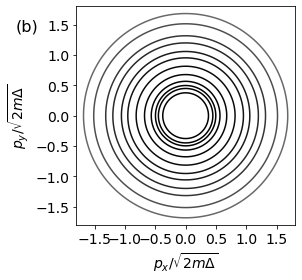

In [53]:
x = np.linspace(-1.8, 1.8, 500)
KX, KY = np.meshgrid(x, x)

g1d_param = 390/5.0
dispersion_normal = np.sqrt((KX**2+KY**2)**2+1)


#dispersion_trigonal[dispersion_trigonal>1.25] = 1.25
#dispersion_trigonal[np.sqrt(KX**2+KY**2)>1.8] = 5.5

fig = plt.subplot(111)

#cmap = colors.ListedColormap(['gray','red'])
#bounds = [1.0,1.1,2.5]
#norm = colors.BoundaryNorm(bounds, cmap.N)

#plt.contourf(KX, KY, dispersion_trigonal, levels=np.concatenate((np.linspace(1.0, 1.1, 20), np.linspace(1.11, 4.1, 20))), 
#             cmap = cmap, norm = norm)

cs = plt.contour(KX, KY, dispersion_normal, levels=[1.01, 1.02, 1.03, 1.05, 1.1, 1.2, 1.35, 1.5, 
                                                      1.75, 2.0, 2.5, 3.0, 3.5, 4.0], cmap = 'gray', vmin=1.0, vmax=5.9)
#cs = plt.contour(KX, KY, dispersion_normal, levels=200, cmap = 'viridis', vmin=1.0, vmax=5.9)


#plt.contour(KX, KY, dispersion_trigonal, levels=200, cmap='gray', #vmin=1.04, vmax = 1.4, 
#             norm=colors.LogNorm(vmin=dispersion_trigonal.min(), vmax=dispersion_trigonal.max()))


plt.xlim(min(x),max(x))
plt.ylim(min(x),max(x))

circ = Circle((0.0, 0.0), 1.8, transform=plt.gca().transData)
for coll in cs.collections:
    coll.set_clip_path(circ)

plt.gca().set_aspect('equal')


plt.xticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.yticks(ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5], size=14)
plt.xlabel(r'$p_x/\sqrt{2m\Delta}$', fontsize=14)
plt.ylabel(r'$p_y/\sqrt{2m\Delta}$', fontsize=14)

plt.text(-2.8, 1.4, '(b)', fontsize=16)
plt.tight_layout()
plt.savefig('fig2_no_trigonal_warping_contours_b_d5meV.pdf')
plt.show()

In [54]:
print(np.sqrt(390/5.0))

8.831760866327848


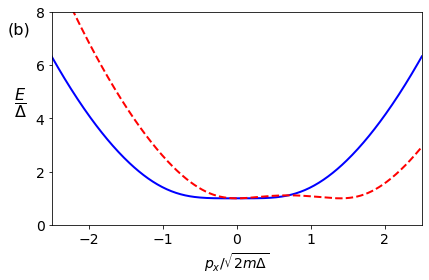

In [101]:
#spectral plot with trigonal warping - comparison
#cos 3 phi = 4 cos^3 phi - 3 cos phi
#cos phi = x / sqrt(x^2+y^2)

x = np.linspace(-2.5, 2.5, 400)


g1d_param = 390/2.0
dispersion_trigonal = np.sqrt((x**2)**2+1+0.1**2*g1d_param*(x**2)-(x**2)**(3/2)*0.2*np.sqrt(g1d_param)*\
                             (4*(x/np.sqrt(x**2))**3-3*x/np.sqrt(x**2)))
dispersion_normal = np.sqrt((x**2)**2+1)


fig = plt.subplot(111)

#cmap = colors.ListedColormap(['gray','red'])
#bounds = [1.0,1.1,2.5]
#norm = colors.BoundaryNorm(bounds, cmap.N)

#plt.contourf(KX, KY, dispersion_trigonal, levels=np.concatenate((np.linspace(1.0, 1.1, 20), np.linspace(1.11, 4.1, 20))), 
#             cmap = cmap, norm = norm)

plt.plot(x, dispersion_normal, color='blue', linewidth=2.0, label='without trigonal warping')
plt.plot(x, dispersion_trigonal, '--', color='red', linewidth=2.0, label='with trigonal warping')

plt.xlim(min(x),max(x))
plt.ylim(0.0, 8.0)
#plt.gca().set_aspect('equal')

plt.gca().tick_params(which='major', labelsize=14)
plt.xlabel(r'$p_x/\sqrt{2m\Delta}$', fontsize=14)
plt.ylabel(r'$\dfrac{E}{\Delta}$', fontsize=16, rotation=0, labelpad=15)

plt.text(-3.1, 7.2, '(b)', fontsize=16)
plt.tight_layout()
plt.savefig('fig2_trigonal_warping_spectrum_b_d2meV.pdf')
plt.show()

In [60]:
np.sort([1,5,3,4])

array([1, 3, 4, 5])